In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [3]:
# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


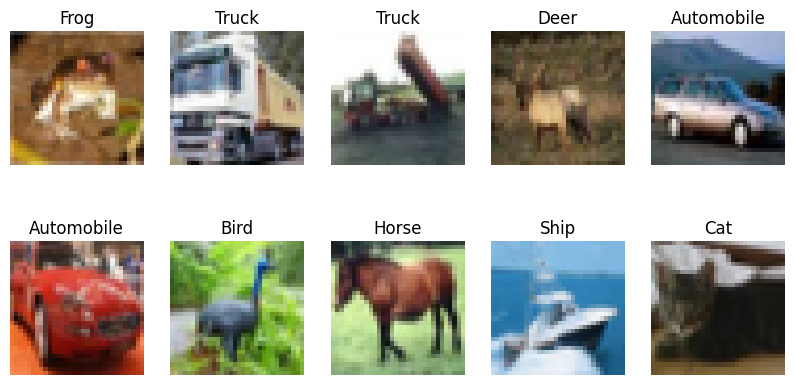

In [4]:
plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')

plt.show()


In [5]:
# Flatten images
X_flat = X_train.reshape(X_train.shape[0], -1)

# Convert into DataFrame
df = pd.DataFrame(X_flat)

# Add labels column
df['Label'] = y_train

df.head()


,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1


In [6]:
print("Dataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3073 entries, 0 to Label
dtypes: uint8(3073)
memory usage: 146.5 MB
None

Statistical Summary:
                  0            1             2            3             4  \
count  50000.000000  50000.00000  50000.000000  50000.00000  50000.000000   
mean     130.710740    136.05614    132.553800    130.14036    135.442380   
std       73.412873     72.90798     80.449751     72.44259     71.901316   
min        0.000000      0.00000      0.000000      0.00000      0.000000   
25%       71.000000     77.00000     61.000000     71.00000     78.000000   
50%      128.000000    135.00000    127.000000    127.00000    135.000000   
75%      189.000000    195.00000    207.000000    188.00000    193.000000   
max      255.000000    255.00000    255.000000    255.00000    255.000000   

                  5             6            7             8             9  \
count  50000.000000  50000.000000 

Airplane      5000
Automobile    5000
Bird          5000
Cat           5000
Deer          5000
Dog           5000
Frog          5000
Horse         5000
Ship          5000
Truck         5000
Name: count, dtype: int64


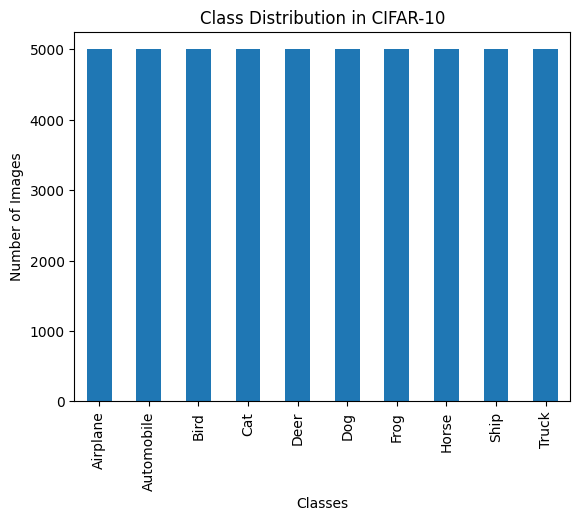

In [7]:
# Count images per class
class_counts = pd.Series(y_train.flatten()).value_counts()

class_counts.index = class_names
print(class_counts)

# Plot distribution
class_counts.plot(kind='bar')
plt.title("Class Distribution in CIFAR-10")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()


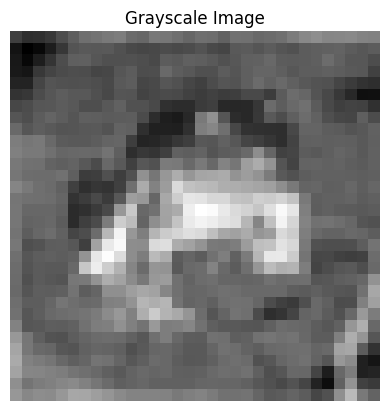

In [8]:
# Convert first image to grayscale
image = X_train[0]

# Using NumPy formula
gray = np.mean(image, axis=2)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


In [9]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

print("Normalized Pixel Range:",
      X_train_norm.min(), "to", X_train_norm.max())


Normalized Pixel Range: 0.0 to 1.0
